## Definitions

In [1]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np

idx = pd.IndexSlice

plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

def load_and_transform_data(zip_file):
    with zipfile.ZipFile(zip_file) as z:
    # open the csv file in the dataset
        with z.open("Covid data/CovidDeaths.csv") as f:

            covid = pd.read_csv(f,index_col=['iso_code','date'], parse_dates=['date'], date_parser=lambda d: pd.to_datetime(d, format="%d-%m-%y"))

            country_columns = ['continent','location','population']
            countries = covid.groupby('iso_code').apply(lambda g: g.iloc[0][country_columns])
            
            countries = countries[countries.apply(lambda row: len(row.name) == 3,axis=1)]
            countries.continent = countries.continent.astype('category')

            keep_covid_columns = ['new_cases','new_deaths','icu_patients','hosp_patients']

            covid = covid[keep_covid_columns]
            covid = covid[covid.apply(lambda row: len(row.name[0]) == 3,axis=1)]

            covid = covid.sort_index()
    return covid.new_cases, covid.new_deaths, covid.icu_patients, covid.hosp_patients, countries

new_cases, new_deaths, icu_patients, hosp_patients, countries = load_and_transform_data('./data/covid.zip')


czech_cases = new_cases.loc[idx['CZE']]
slovak_cases = new_cases.loc[idx['SVK']]


# Lecture 7 - Pandas

by Vítek Macháček, inspired by Martin Hronec

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)

* built on top of NumPy
* Vast majority of your python data work should start and end in Pandas.
* Huge ecosystem that built around

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.


## `pd.Series` - labelled 1D object

###  Construction

Series can be created using:
* `dict`


```python 
pd.Series({'Vítek':31,'Martin':30, 'Honza':30})
```

* `list`, `tuple` or `np.array`


```python 
pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in range(10)],name='Age')
```

* scalar

```python
pd.Series(np.nan,index=['Vítek','Martin','Honza'],name='NANs')
```

Main attributes:

* `values` - collection of measurements, categories etc.
* `name` - column name
* `dtype` - datatype - `int`,`float`,`pd.Timestamp`,`object`
* `shape`

In [2]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [3]:
czech_cases.name

'new_cases'

In [4]:
czech_cases.dtype

dtype('float64')

In [5]:
czech_cases.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq=None)

In [6]:
czech_cases.dtype

dtype('float64')

In [7]:
czech_cases.shape

(921,)

### Args / Kwargs

In [8]:
plotconfig

{'style': '.', 'grid': True, 'markersize': 5, 'figsize': (20, 6)}

<AxesSubplot:xlabel='date'>

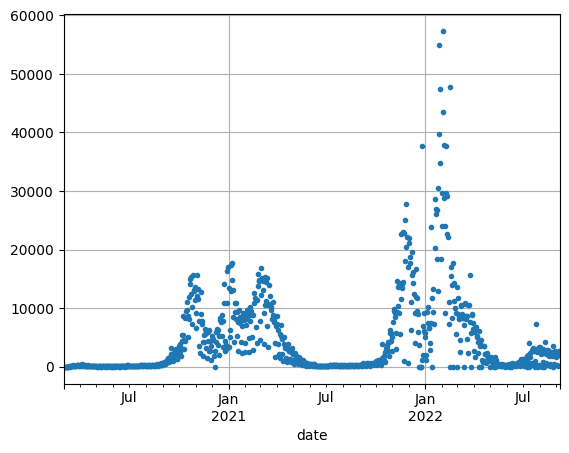

In [9]:
czech_cases.plot(style='.',grid=True)

<AxesSubplot:xlabel='date'>

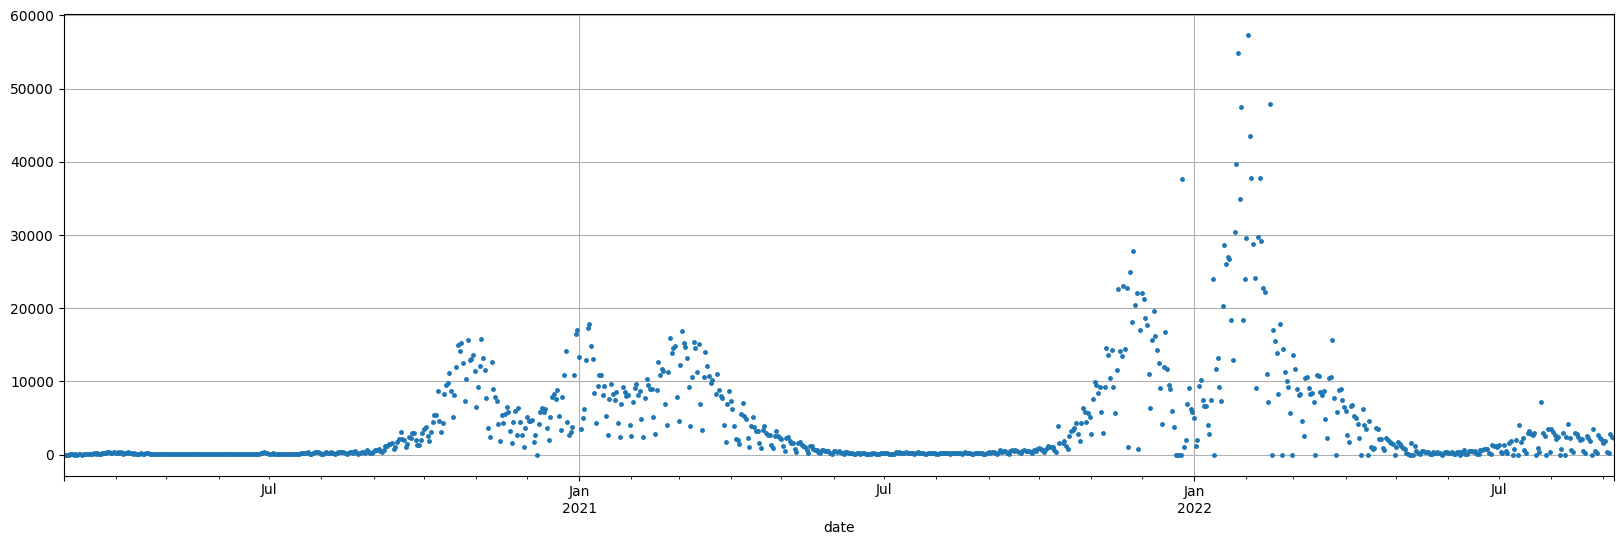

In [10]:
czech_cases.plot(**plotconfig)

In [11]:
czech_cases  +slovak_cases

date
2020-03-01       NaN
2020-03-02       NaN
2020-03-03       NaN
2020-03-04       NaN
2020-03-05       NaN
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Name: new_cases, Length: 921, dtype: float64

In [12]:
czech_cases.add(slovak_cases)# czech_cases + slovak_cases

date
2020-03-01       NaN
2020-03-02       NaN
2020-03-03       NaN
2020-03-04       NaN
2020-03-05       NaN
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Name: new_cases, Length: 921, dtype: float64

## Indexing data
### Using `loc` - selecting based on index labels

In [13]:
czech_cases['2020-12-24']

14149.0

<AxesSubplot:xlabel='date'>

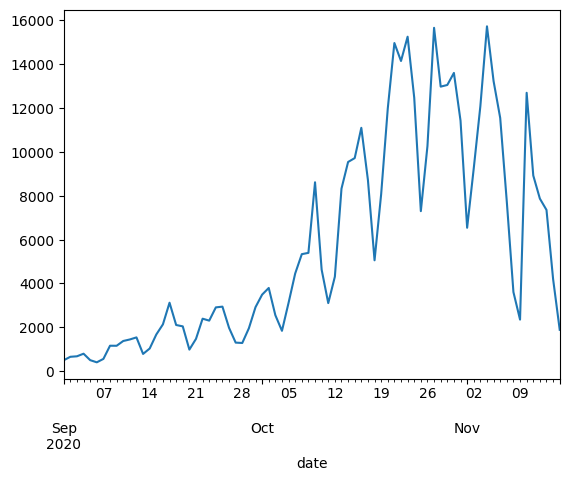

In [14]:
czech_cases.loc['2020-09-01':'2020-11-15'].plot()

Do this only in exceptional cases

In [15]:
czech_cases.loc['2021-03-28'] += 1 

## Using `iloc` - selecting by order
* generally not recommended

In [16]:
czech_cases.iloc[0]

3.0

In [17]:
czech_cases.iloc[-1]

2287.0


### subsetting using `mask` - conditional on value of series

In [18]:
czech_cases[(czech_cases >= 5000) & (czech_cases < 15000)]

date
2020-10-07    5338.0
2020-10-08    5397.0
2020-10-09    8617.0
2020-10-13    8326.0
2020-10-14    9543.0
               ...  
2022-04-04    6579.0
2022-04-05    6729.0
2022-04-06    5305.0
2022-04-11    6155.0
2022-07-26    7241.0
Name: new_cases, Length: 210, dtype: float64

<AxesSubplot:xlabel='date'>

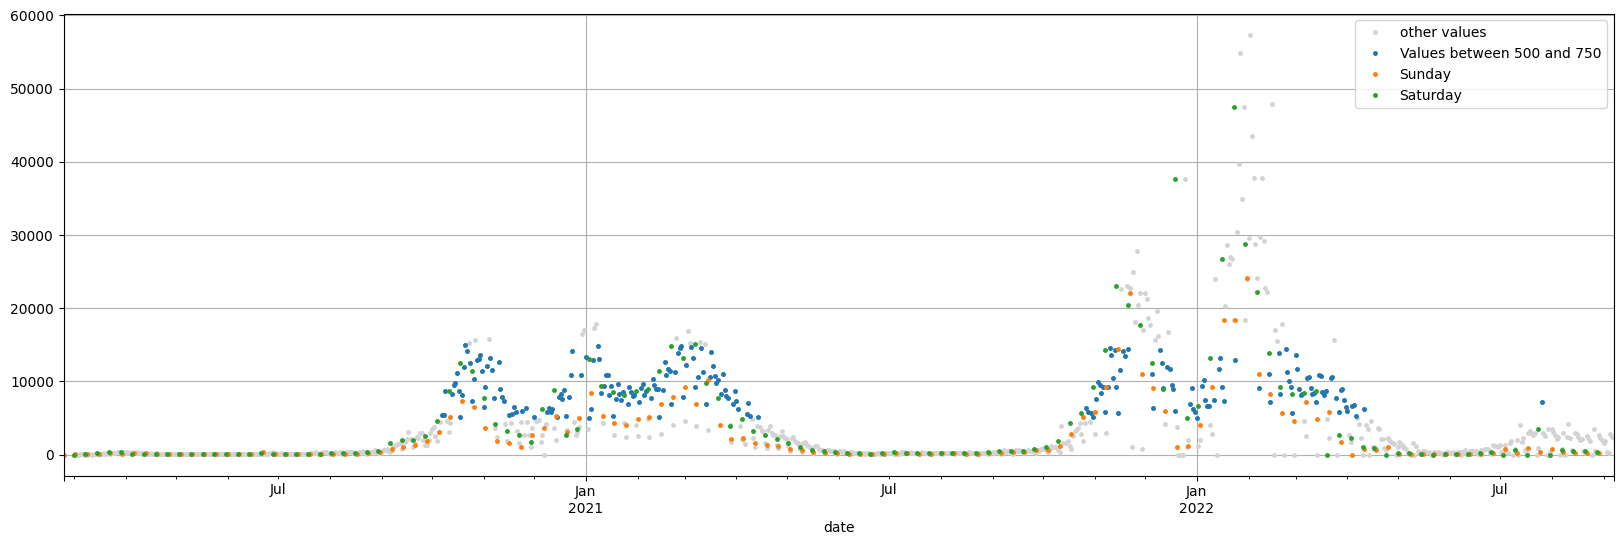

In [19]:
ax = czech_cases.plot(color = 'lightgrey',label='other values',legend=True,**plotconfig)
czech_cases[(czech_cases >= 5000) & (czech_cases < 15000)].plot(ax=ax,label='Values between 500 and 750',legend=True,**plotconfig)
czech_cases[czech_cases.index.weekday == 6].plot(ax=ax,label='Sunday',legend=True,**plotconfig)
czech_cases[czech_cases.index.weekday == 5].plot(ax=ax,label='Saturday',legend=True,**plotconfig)

In [20]:
czech_cases >= 5000

date
2020-03-01    False
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
              ...  
2022-09-03    False
2022-09-04    False
2022-09-05    False
2022-09-06    False
2022-09-07    False
Name: new_cases, Length: 921, dtype: bool

In [21]:
(czech_cases >= 5000) & (czech_cases < 15000)

date
2020-03-01    False
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
              ...  
2022-09-03    False
2022-09-04    False
2022-09-05    False
2022-09-06    False
2022-09-07    False
Name: new_cases, Length: 921, dtype: bool

In [22]:
czech_cases.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='date', length=921)

In [23]:
czech_cases[czech_cases.index.weekday == 6]

date
2020-03-01      3.0
2020-03-08     12.0
2020-03-15     64.0
2020-03-22    125.0
2020-03-29    186.0
              ...  
2022-08-07    801.0
2022-08-14    282.0
2022-08-21    202.0
2022-08-28    209.0
2022-09-04    179.0
Name: new_cases, Length: 132, dtype: float64

## `pd.DataFrame()` - 2D,tabular version of `pd.Series`

In [24]:
slovak_cases

date
2020-03-06    1.0
2020-03-07    0.0
2020-03-08    2.0
2020-03-09    2.0
2020-03-10    2.0
             ... 
2022-09-03    0.0
2022-09-04    0.0
2022-09-05    0.0
2022-09-06    0.0
2022-09-07    0.0
Name: new_cases, Length: 916, dtype: float64

<AxesSubplot:xlabel='date'>

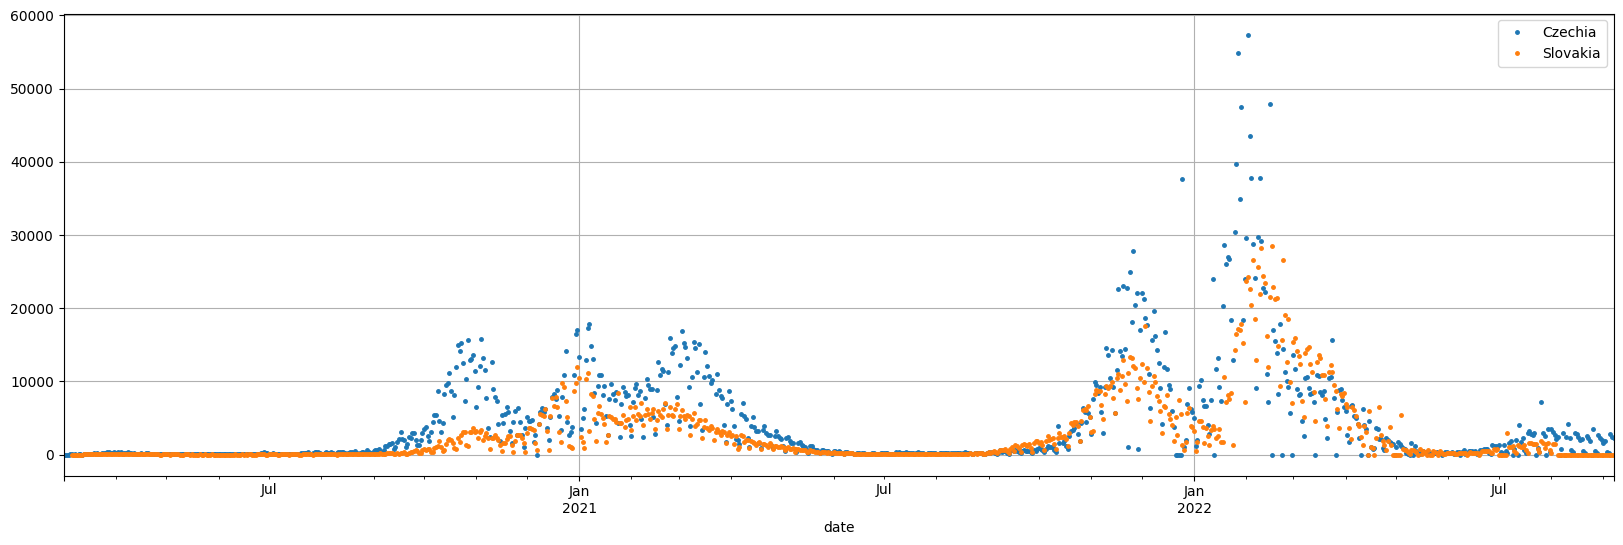

In [25]:
df = pd.DataFrame({'Czechia':czech_cases,'Slovakia':slovak_cases})
df.plot(**plotconfig)


### DataFrame construction from raw data:
#### row-wise: list into pd.DataFrame

Each member of the list is one row

* iterable with values
* pd.Series
* dict

#### column-wise dict into pd.DataFrame

**key** is the column name

**value** is the content (should be iterable)

## Input-Output


In [26]:
df.sample(5)

,Czechia,Slovakia
date,,
2021-01-21,8228.0,4792.0
2020-11-29,1074.0,1533.0
2020-07-27,192.0,2.0
2021-10-20,3269.0,4297.0
2020-11-19,6471.0,2107.0


In [27]:
df.shape

(921, 2)

In [28]:
df.dtypes

Czechia     float64
Slovakia    float64
dtype: object

In [29]:
df.iloc[0]

Czechia     3.0
Slovakia    NaN
Name: 2020-03-01 00:00:00, dtype: float64

In [30]:
df['Czechia'] # or df.Czechia

date
2020-03-01       3.0
2020-03-02       0.0
2020-03-03       2.0
2020-03-04       3.0
2020-03-05       4.0
               ...  
2022-09-03     379.0
2022-09-04     179.0
2022-09-05    2761.0
2022-09-06    2458.0
2022-09-07    2287.0
Freq: D, Name: Czechia, Length: 921, dtype: float64

In [31]:
df

,Czechia,Slovakia
date,,
2020-03-01,3.0,NaN
2020-03-02,0.0,NaN
2020-03-03,2.0,NaN
2020-03-04,3.0,NaN
2020-03-05,4.0,NaN
...,...,...
2022-09-03,379.0,0.0
2022-09-04,179.0,0.0
2022-09-05,2761.0,0.0


In [32]:
df.stack().index

MultiIndex([('2020-03-01',  'Czechia'),
            ('2020-03-02',  'Czechia'),
            ('2020-03-03',  'Czechia'),
            ('2020-03-04',  'Czechia'),
            ('2020-03-05',  'Czechia'),
            ('2020-03-06',  'Czechia'),
            ('2020-03-06', 'Slovakia'),
            ('2020-03-07',  'Czechia'),
            ('2020-03-07', 'Slovakia'),
            ('2020-03-08',  'Czechia'),
            ...
            ('2022-09-03',  'Czechia'),
            ('2022-09-03', 'Slovakia'),
            ('2022-09-04',  'Czechia'),
            ('2022-09-04', 'Slovakia'),
            ('2022-09-05',  'Czechia'),
            ('2022-09-05', 'Slovakia'),
            ('2022-09-06',  'Czechia'),
            ('2022-09-06', 'Slovakia'),
            ('2022-09-07',  'Czechia'),
            ('2022-09-07', 'Slovakia')],
           names=['date', None], length=1833)

In [33]:
df.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq='D')

## Deeper look at the `index`

In [34]:
df.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='date', length=921, freq='D')

In [35]:
df.index.dtype

dtype('<M8[ns]')

## Dtypes

* **Numeric** - `int64` and `float64`

* **Datetime** - `datetime64[ns]`
    - Datetimes can be timezone-aware
    - variable precision
    - see `pd.to_datetime`

* **Categorical**
    - set of values specified in advance
    - efficient performance
    - possible to specify ordering (`strongly agree` vs. `agree`)

* **Object** - everything else
    - most often str
    - But also list or virtually anything

* **Custom datatypes**
    - geometry in geopandas


In [36]:
df.columns

Index(['Czechia', 'Slovakia'], dtype='object')

## Path to `MultiIndex`

In [37]:
new_cases

iso_code  date      
ABW       2020-03-13     2.0
          2020-03-14     0.0
          2020-03-15     0.0
          2020-03-16     0.0
          2020-03-17     1.0
                        ... 
ZWE       2022-09-03    11.0
          2022-09-04     8.0
          2022-09-05     6.0
          2022-09-06    13.0
          2022-09-07    43.0
Name: new_cases, Length: 201117, dtype: float64

In [38]:
new_cases.unstack('iso_code')

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


In [39]:
new_cases

iso_code  date      
ABW       2020-03-13     2.0
          2020-03-14     0.0
          2020-03-15     0.0
          2020-03-16     0.0
          2020-03-17     1.0
                        ... 
ZWE       2022-09-03    11.0
          2022-09-04     8.0
          2022-09-05     6.0
          2022-09-06    13.0
          2022-09-07    43.0
Name: new_cases, Length: 201117, dtype: float64

In [40]:
new_cases.index

MultiIndex([('ABW', '2020-03-13'),
            ('ABW', '2020-03-14'),
            ('ABW', '2020-03-15'),
            ('ABW', '2020-03-16'),
            ('ABW', '2020-03-17'),
            ('ABW', '2020-03-18'),
            ('ABW', '2020-03-19'),
            ('ABW', '2020-03-20'),
            ('ABW', '2020-03-21'),
            ('ABW', '2020-03-22'),
            ...
            ('ZWE', '2022-08-29'),
            ('ZWE', '2022-08-30'),
            ('ZWE', '2022-08-31'),
            ('ZWE', '2022-09-01'),
            ('ZWE', '2022-09-02'),
            ('ZWE', '2022-09-03'),
            ('ZWE', '2022-09-04'),
            ('ZWE', '2022-09-05'),
            ('ZWE', '2022-09-06'),
            ('ZWE', '2022-09-07')],
           names=['iso_code', 'date'], length=201117)

In [41]:
new_cases.loc[('CZE','2020-12-24')]

14149.0

if slicing or multi-selecting use `idx = pd.IndexSlice` (in definitions)

In [42]:
czechoslovak_christmas = new_cases.loc[idx[['CZE','SVK'],'2020-12-24':'2020-12-27']] #
czechoslovak_christmas

iso_code  date      
CZE       2020-12-24    14149.0
          2020-12-25     4402.0
          2020-12-26     2706.0
          2020-12-27     3030.0
SVK       2020-12-24     7354.0
          2020-12-25     5064.0
          2020-12-26     1182.0
          2020-12-27     1086.0
Name: new_cases, dtype: float64

## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `pd.Series` into `pd.DataFrame`: `.unstack`

In [43]:
czechoslovak_christmas.unstack()

date,2020-12-24,2020-12-25,2020-12-26,2020-12-27
iso_code,,,,
CZE,14149.0,4402.0,2706.0,3030.0
SVK,7354.0,5064.0,1182.0,1086.0


In [44]:
new_cases.head()

iso_code  date      
ABW       2020-03-13    2.0
          2020-03-14    0.0
          2020-03-15    0.0
          2020-03-16    0.0
          2020-03-17    1.0
Name: new_cases, dtype: float64

In [45]:
new_cases.unstack('iso_code')

iso_code,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,...,VGB,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,0.0,251.0,0.0,0.0,131.0,0.0,400.0,11636.0,0.0,0.0,...,0.0,NaN,1391.0,0.0,0.0,0.0,5.0,159.0,252.0,8.0
2022-09-05,66.0,192.0,0.0,14.0,28.0,0.0,398.0,NaN,2329.0,0.0,...,0.0,NaN,2161.0,28.0,0.0,0.0,0.0,108.0,12.0,6.0
2022-09-06,0.0,259.0,0.0,0.0,62.0,0.0,411.0,NaN,NaN,0.0,...,0.0,NaN,3699.0,28.0,0.0,0.0,0.0,0.0,38.0,13.0


### Stack `pd.DataFrame` to `pd.Series`


In [46]:
df.stack()

date                
2020-03-01  Czechia        3.0
2020-03-02  Czechia        0.0
2020-03-03  Czechia        2.0
2020-03-04  Czechia        3.0
2020-03-05  Czechia        4.0
                         ...  
2022-09-05  Slovakia       0.0
2022-09-06  Czechia     2458.0
            Slovakia       0.0
2022-09-07  Czechia     2287.0
            Slovakia       0.0
Length: 1833, dtype: float64

## Applying functions

### on `pd.Series`

#### Aggregation
- decreasing dimensionality

In [47]:
czech_cases.mean()

4415.204570184984

In [48]:
czech_cases.min()

0.0

In [49]:
czech_cases.sum()

4057573.0

In [50]:
czech_cases.agg([np.mean,np.max,np.mean,np.median,np.std])

mean       4415.204570
amax      57378.000000
mean       4415.204570
median     1186.000000
std        7038.479926
Name: new_cases, dtype: float64

### Transforming
* preserves dimensionality and shape

In [51]:
czech_cases.diff()

date
2020-03-01       NaN
2020-03-02      -3.0
2020-03-03       2.0
2020-03-04       1.0
2020-03-05       1.0
               ...  
2022-09-03   -1479.0
2022-09-04    -200.0
2022-09-05    2582.0
2022-09-06    -303.0
2022-09-07    -171.0
Name: new_cases, Length: 921, dtype: float64

In [52]:
czech_cases.apply(np.log)

date
2020-03-01    1.098612
2020-03-02        -inf
2020-03-03    0.693147
2020-03-04    1.098612
2020-03-05    1.386294
                ...   
2022-09-03    5.937536
2022-09-04    5.187386
2022-09-05    7.923348
2022-09-06    7.807103
2022-09-07    7.734996
Name: new_cases, Length: 921, dtype: float64

In [53]:
czech_cases.cumsum()

date
2020-03-01          3.0
2020-03-02          3.0
2020-03-03          5.0
2020-03-04          8.0
2020-03-05         12.0
                ...    
2022-09-03    4049888.0
2022-09-04    4050067.0
2022-09-05    4052828.0
2022-09-06    4055286.0
2022-09-07    4057573.0
Name: new_cases, Length: 921, dtype: float64

In [54]:
czech_cases.pct_change()

date
2020-03-01          NaN
2020-03-02    -1.000000
2020-03-03          inf
2020-03-04     0.500000
2020-03-05     0.333333
                ...    
2022-09-03    -0.796017
2022-09-04    -0.527704
2022-09-05    14.424581
2022-09-06    -0.109743
2022-09-07    -0.069569
Name: new_cases, Length: 921, dtype: float64

#### Custom functions

In [55]:
unit_variance(czech_cases)

NameError: name 'unit_variance' is not defined

In [ ]:
df

In [ ]:
df.apply(lambda series: (series - np.mean(series)) / np.std(series))

In [ ]:
czech_cases.apply(lambda x: (x**2) -25)

## Applying functions on `pd.DataFrame`
### Aggregating

In [ ]:
df

In [ ]:
df.sum()

In [ ]:
df.sum(axis=1)

### Custom function on `pd.DataFrame`

In [ ]:
df

In [ ]:
def describe_day(row):
    date = row.name
    return f'On {date.day_name()} of {date.month_name()} {date.day}, {date.year}, there were {row.Czechia} cases in Czechia and {row.Slovakia} cases in Slovakia'
df.apply(describe_day,axis=1)

In [ ]:
def describe_country(col):
    return f'Between {col.index.min():%Y/%m/%d} and {col.index.max():%Y/%m/%d} there were on average {col.mean()} with standard deviation {col.std()}'

df.apply(describe_country,axis=0)

### Combine `.apply` with reshaping

In [ ]:
cntr_cases = new_cases.unstack('iso_code')
cntr_cases

In [ ]:
new_cases.unstack(['date','']).median()

In [ ]:
cntr_cases.median(axis=1)

In [ ]:
cntr_cases.apply([np.mean,np.median,np.std],axis=0)

In [ ]:
def share_of_missing(col):
    return col.isna().sum()/col.shape[0]
cntr_cases.apply(share_of_missing).sort_values().plot.bar(figsize=(30,6))

In [ ]:
cntr_cases

In [ ]:
cntr_cases.apply(lambda time_series: pd.Series({'date':time_series.idxmax(),'value':time_series.max()})).T

### Row-wise

- "best in covid"

In [ ]:
def get_best_in_covid(row):
    return pd.Series({'best':row.idxmax(),'value':row.max()})
cntr_cases.apply(get_best_in_covid,axis='columns').best.value_counts().sort_values()

## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


In [ ]:
covid = pd.DataFrame({
    'new_cases':new_cases,
    'new_deaths':new_deaths
}).join(countries)
covid

In [ ]:
covid.groupby('continent').median()

In [ ]:
covid.groupby(['continent', pd.Grouper(level='date',freq='M')]).new_cases.median().unstack('continent').plot()

### Vítek's messy analytics one-liners

In [ ]:
covid.groupby(['continent', pd.Grouper(level='date',freq='M')]).new_cases.median().unstack('continent').plot(figsize=(12,6),title='Median cases in month in continent')

### Group By + Apply

In [ ]:
interesting_countries = ['Austria', 'Poland', 'Germany', 'Czechia', 'Slovakia', 'Hungary', 'France', 'Denmark', 'Sweden']

some_countries = covid[covid.location.isin(interesting_countries)]
some_countries['deaths_per_case'] = some_countries.new_deaths/some_countries.new_cases
some_countries

In [ ]:
country_names = pd.Series({'AUT':'Austria','SWE':'Sweden'})

In [ ]:
some_countries.new_cases.index.get_level_values('iso_code').map(country_names)

In [ ]:
some_countries.groupby(['location',pd.Grouper(level='date',freq='M')]).apply(lambda g: g.new_cases.median()/g.population.iloc[0]).unstack('location').plot(title='Median cases per capita in Europe monthly',figsize=(12,6))

In [ ]:
some_countries.groupby(['location',pd.Grouper(level='date',freq='M')]).deaths_per_case.median().unstack('location').plot(title='Median deaths per case monthly',figsize=(12,6))

In [ ]:
sns.heatmap(some_countries.groupby(['iso_code',lambda idx: idx[1].weekday()]).apply(lambda g: g.new_cases.median()/g.population.iloc[0]).unstack(1))

In [ ]:

filenames = []


pd.concat([pd.read_csv(file).assign(filname=file) for file in filenames])

## Merging and joing datasets

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - alignment (along index or columns)
* `pd.merge` - combining data (along columns, by values)
    * `df.join` - merge on index


### Concatenate
![concatenate](./img/concatenate.png)

### Merge
![merge](./img/merge.png)



## Rolling object

In [ ]:
ax = czech_cases.plot(label='original',**plotconfig,legend=True)
czech_cases.rolling(3).mean().plot(label='3 days rolling',ax=ax,legend=True)
czech_cases.rolling(5).mean().plot(label='5 days rolling',ax=ax,legend=True)
czech_cases.rolling(10).mean().plot(label='10 days rolling',ax=ax,legend=True)